In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as clrs
import matplotlib as mpl

from sklearn import preprocessing #ajout du numéro 

import time
import os

%matplotlib inline

In [2]:
t_start_global0 = time.time()

---

Chargement des jeux de données
---

In [3]:
t_start = time.time()

df_ath1 = pd.read_pickle("../data/formatted/df_ath1_full.pkl")
df_ath2 = pd.read_pickle("../data/formatted/df_ath2_full.pkl")

df_morning_ath1 = pd.read_pickle("../data/formatted/df_ath1_morning.pkl")
df_morning_ath2 = pd.read_pickle("../data/formatted/df_ath2_morning.pkl")

print(f"Time taken: {time.time()-t_start}")

Time taken: 0.354203462600708


In [4]:
print("athlete 1")
print("df_ath1.shape          ", df_ath1.shape)
print("df_morning_ath1.shape  ", df_morning_ath1.shape)

print(" \n ----------------------------------------- \n ")

print("athlete 2")
print("df_ath2.shape          ", df_ath2.shape)
print("df_morning_ath2.shape  ", df_morning_ath2.shape)

athlete 1
df_ath1.shape           (1040076, 28)
df_morning_ath1.shape   (150, 20)
 
 ----------------------------------------- 
 
athlete 2
df_ath2.shape           (903061, 28)
df_morning_ath2.shape   (20, 20)


---

## Regarder la complétion des données

In [5]:
%run utils.ipynb
# %timeit df_completion(df_ath1, df_ath2)

df_completion(df_ath1, df_ath2)

,ath1,ath2
Timestamp,100.0%,100.0%
tps,100.0%,100.0%
date,100.0%,100.0%
training_counter,100.0%,100.0%
day_index,100.0%,100.0%
training_index,100.0%,100.0%
type_ent,100.0%,100.0%
day_cycle,100.0%,32.1%
phase,100.0%,32.1%
activite,100.0%,100.0%


---

# Répartition des différents entraînements

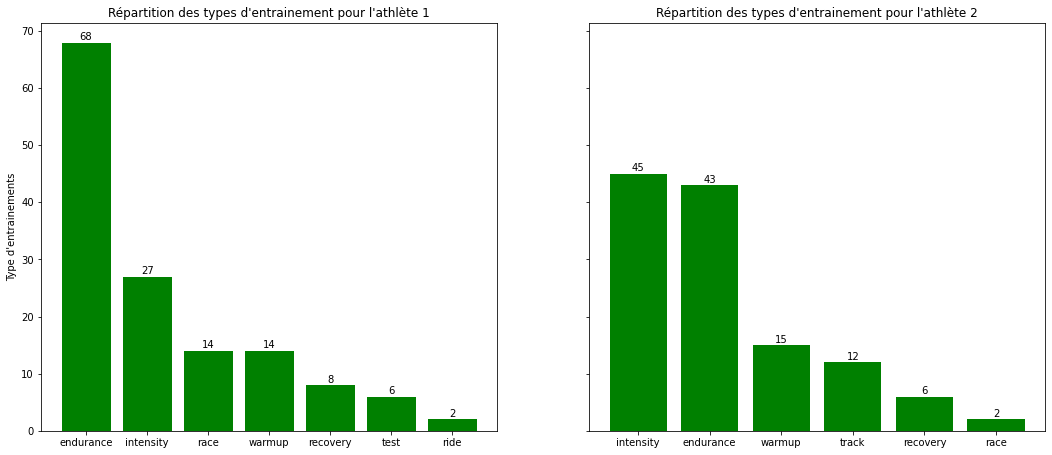

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18., 7.5), sharey=True)

df_loc = df_ath1.drop_duplicates(['date', 'type_ent'])
ax1.bar(df_loc['type_ent'].value_counts().index, df_loc['type_ent'].value_counts(), color="green")
for n,k in enumerate(df_loc['type_ent'].value_counts()):
    ax1.text(n, k+1, str(k), horizontalalignment = 'center', verticalalignment = 'center')
ax1.title.set_text("Répartition des types d'entrainement pour l'athlète 1")

df_loc = df_ath2.drop_duplicates(['date', 'type_ent'])
ax2.bar(df_loc['type_ent'].value_counts().index, df_loc['type_ent'].value_counts(), color="green")
for n,k in enumerate(df_loc['type_ent'].value_counts()):
    ax2.text(n, k+1, str(k), horizontalalignment = 'center', verticalalignment = 'center')
ax2.title.set_text("Répartition des types d'entrainement pour l'athlète 2")

ax1.set_ylabel("Type d'entrainements");

%run utils.ipynb

dates_ath1 = df_ath1['date'].unique()
focus_on_training(df_ath1, list_dates=dates_ath1[:5])

---

## Regarder les corrélations dans les données

#### Deux tableaux côte à côte pour les comparer

corr1 = df_ath1.corr(method='pearson')
corr2 = df_ath2.corr(method='pearson')


fig, ax = plt.subplots(1,2, figsize=(30, 10));

g1 = sns.heatmap(corr1, cmap='coolwarm', vmin=-1.0, vmax=1.0, ax=ax[0], square=True, annot=True, fmt=".2f");
g1.set_xticklabels(g1.get_xticklabels(), rotation=60, fontdict={"horizontalalignment":"right"});
g1.set_title(label='Correlations athlete 1', fontsize=20, loc='center', pad=10);

g2 = sns.heatmap(corr2, cmap='coolwarm', vmin=-1.0, vmax=1.0, ax=ax[1], square=True, annot=True, fmt=".2f");
g2.set_xticklabels(g2.get_xticklabels(), rotation=60, fontdict={"horizontalalignment":"right"});
g2.set_title(label='Correlations athlete 2', fontsize=20, loc='center', pad=10);

#### Un seul tableau à la fois, peut-être plus lisible

corr = df_ath1.corr(method='pearson')

fig, ax = plt.subplots(1,1, figsize=(26, 12));

g = sns.heatmap(corr, cmap='coolwarm', vmin=-1.0, vmax=1.0, ax=ax, square=True, annot=True, fmt=".2f");
g.set_xticklabels(g1.get_xticklabels(), rotation=60, fontdict={"horizontalalignment":"right"});
g.set_title(label='Correlations athlete', fontsize=20, loc='center', pad=10);

---

## Filtrer le dataframe

In [7]:
print(df_ath1.columns.tolist())

['Timestamp', 'tps', 'date', 'training_counter', 'day_index', 'training_index', 'type_ent', 'day_cycle', 'phase', 'activite', 'duree', 'kcal_cst', 'id', 'dist_totale_cst', 'mean_power', 'max_power', 'mean_hr', 'name', 'latitude', 'longitude', 'altitude', 'temperature', 'heart_rate', 'speed_meters_per_sec', 'power_watts', 'bike_cadence', 'distance_cumul', 'add_tps']


In [8]:
%run utils.ipynb

df_exemple1 = filter_df(df_ath1, qtty="date", filtre={'kind':'include', 'list':["2021-06-09"]})
print(f"df_exemple1.shape : {df_exemple1.shape}")

df_exemple2 = filter_df(df_ath1, qtty="date", filtre={'kind':'exclude', 'list':["2021-06-09"]})
print(f"df_exemple2.shape : {df_exemple2.shape}")

df_exemple3 = filter_df(df_ath1, qtty="type_ent", filtre={'kind':'include', 'list':["endurance", "intensity"]})
print(f"df_exemple2.shape : {df_exemple3.shape}")

df_exemple1.shape : (17397, 28)
df_exemple2.shape : (17397, 28)
df_exemple2.shape : (849331, 28)


---

# Quelques propositions de plots

%run utils.ipynb

#C> - df_ath1["type_ent"].unique()   #C> --> ['endurance', 'intensity', 'recovery', 'race', 'warmup', 'test', 'ride', 'nan']
list_valeurs = ["intensity", "race"]

for train in list_valeurs:
    df_reduced = filter_df(df_ath1, qtty="type_ent", filtre={'kind':'include', 'list':[train]})
    print(f"Entraînement: {train} - # de date {len(df_reduced['date'].unique())} - # de points : {len(df_reduced)}")

    plot_df(df_reduced, qtty_x='tps', qtty_y='heart_rate', groupby='date', figtitle=train, tuple_figsize=(18.,8.))

---

## Comparer différentes valeurs pour un entraînement, ou sur plusieurs entraînement

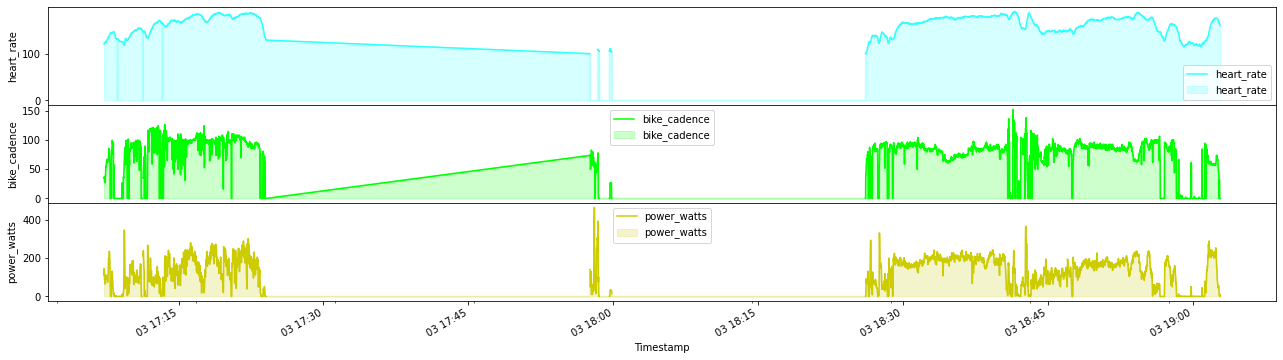

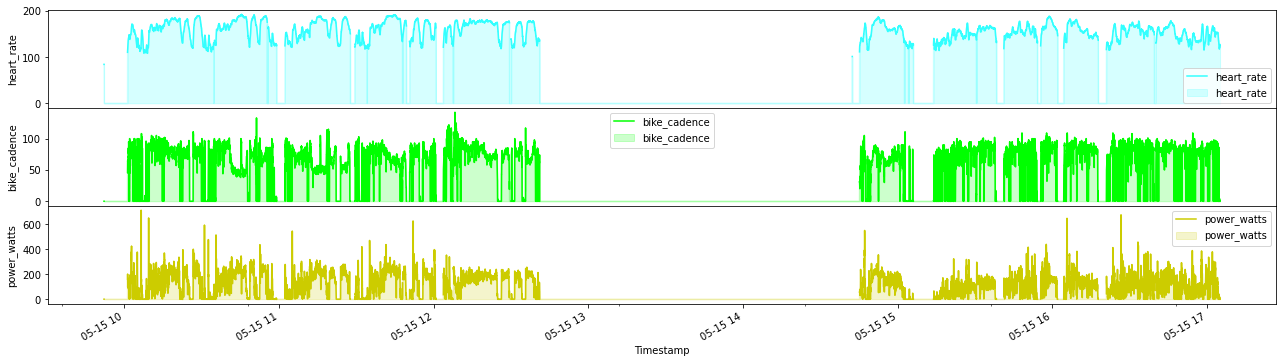

In [9]:
%run utils.ipynb


list_dates = ['2021-05-03', '2021-05-15'] #, '2021-06-05', '2021-06-11', '2021-06-30', '2021-07-30', '2021-07-31', '2021-08-20']

list_to_plot = ["heart_rate", "bike_cadence", "power_watts"]#, "altitude", "temperature"]

for ctr, date in enumerate(list_dates):
    df_reduced = filter_df(df_ath1, qtty="date", filtre={'kind':'include', 'list':[date]})

    plot_df_1day_time_series(df_reduced, x_qtty="Timestamp", qtties_plot=list_to_plot, tuple_figsize=(22.,6.), shade_area=True)

---

## Get dataframe formatted for time series investigation

%run utils.ipynb

time_series = ['latitude']#, 'longitude', 'altitude', 'temperature', 'heart_rate', 'speed_meters_per_sec', 'power_watts', 'bike_cadence', 'distance_cumul']

df_ath1_ts = make_df_timeseries(df_ath1, qtties=time_series)

In [10]:
print(f"Time taken so far: {time.time()-t_start_global0}")

Time taken so far: 4.192281246185303


---

In [11]:
os.chdir('./FIF-master/')

In [12]:
!python ./setup.py build_ext --inplace

/opt/anaconda/anaconda3/lib/python3.9/site-packages/setuptools/dist.py:717: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  warnings.warn(
running build_ext
skipping '_fif.cpp' Cython extension (up-to-date)


---

In [26]:
%run ../utils.ipynb
import fif as FIF

#C>-----

def prepare_FIF(df_tmp, qtty='type_ent', qtty_val='endurance', grandeur='heart_rate'):
    t_start = time.time()

    df_tmp = filter_df(df_tmp, qtty=qtty, filtre={'kind':'include', 'list':[qtty_val]})
    print(f"{qtty}: {qtty_val} - # de dates {len(df_tmp['date'].unique())} - # de points : {len(df_tmp)}.\n")

    #C> - time_series : 'latitude', 'longitude', 'altitude', 'temperature', 'heart_rate', 'speed_meters_per_sec', 'power_watts', 'bike_cadence', 'distance_cumul']
    df_tmp_ts = make_df_timeseries(df_tmp, qtties=[grandeur])
    print(df_tmp_ts.columns.tolist()[:10])
    qtty_val_got, grandeur_got = df_tmp_ts['type_entrainement'].unique(), df_tmp_ts['grandeur'].unique()

    length_mean, length_std, length_min, length_max = df_tmp_ts['length'].mean(), df_tmp_ts['length'].std(), df_tmp_ts['length'].min(), df_tmp_ts['length'].max()
    print(f"\nLength: mean = {length_mean}, std = {length_std}, min = {length_min}, max = {length_max}\n")

    df_tmp_ts = df_tmp_ts[df_tmp_ts['length'] <= length_mean+length_std]
    print(f"Le dataframe ne contient plus que {len(df_tmp_ts)} séries temporelles distinctes, avec {df_tmp_ts['length'].max()} points pour la plus longue.")
    length_mean, length_std, length_min, length_max = df_tmp_ts['length'].mean(), df_tmp_ts['length'].std(), df_tmp_ts['length'].min(), df_tmp_ts['length'].max()
    print(f"Length: mean = {length_mean}, std = {length_std}, min = {length_min}, max = {length_max}")

    print(f"Time taken: {time.time()-t_start}\n\n")
    df_fif = df_tmp_ts.drop(columns=["numero_entrainement", "type_entrainement", "grandeur", "length"])

    return df_fif, length_max

#C>-----

def compute_FIF(df_fif, len_max, train, grandeur, dict_val=2, nb_trees=19):
    tps_ts_loc = np.arange(1, len_max+1, 1).astype(np.float64)
    X_ts_loc = df_fif.to_numpy()[:, :len_max]

    print(f"Training type: {train} --> quantity tracked: {grandeur}.")
    print(f"Trying to run a FIF with array of {np.shape(X_ts_loc)[0]} time series of max. length {np.shape(X_ts_loc)[1]}, times: {len(tps_ts_loc)}.")

    F  = FIF.FiForest(X_ts_loc, time=tps_ts_loc, ntrees=nb_trees, sample_size=64, dic_number=dict_val, alpha=0.5, seed=0)
    #C> - dic_number set the dictionary where data are projected.three dictionaries are available:
    #C> - 0 corresponds to Brownian motion, 1 to gaussian wavelets and 2 to cosine dictionary.

    return X_ts_loc, tps_ts_loc, F.compute_paths()

#C>-----

def plot_FIF(X_ts_loc, tps_ts_loc, X_anomaly_score_loc, grandeur=grandeur):
    fig = plt.figure(figsize=(28,12))

    #C>-----

    ax2 = fig.add_subplot(311)
    for i in range(len(X_anomaly_score_loc)-5):
        ax2.scatter(np.arange(len(X_anomaly_score_loc))[i], np.sort(X_anomaly_score_loc)[i], color='Lightgray', marker='x', alpha=0.5)

    ax2.scatter(i+1, np.sort(X_anomaly_score_loc)[i+1], color='orange', marker='x', label='$x_0$')
    ax2.scatter(i+2, np.sort(X_anomaly_score_loc)[i+2], c='b', marker='x', label='$x_1$')
    ax2.scatter(i+3, np.sort(X_anomaly_score_loc)[i+3], c='g', marker='x',  label='$x_2$')
    ax2.scatter(i+4, np.sort(X_anomaly_score_loc)[i+4], c='r', marker='x', label='$x_3$')
    ax2.scatter(i+5, np.sort(X_anomaly_score_loc)[i+5], c='m', marker='x', label='$x_4$')

    ax2.set_xlabel('Index of sorted curves',size=15)
    ax2.yaxis.tick_right()

    ax2.yaxis.set_label_position("left")
    ax2.set_ylabel('Score',size=15)
    ax2.legend(fontsize='large')

    #C>-----

    ax1 = fig.add_subplot(312)
    for i in range(len(X_ts_loc)-5):
        ax1.plot(tps_ts_loc, X_ts_loc[i, :], c='Lightgray', linewidth=0.3)

    ax1.plot(tps_ts_loc, X_ts_loc[-5,:], c='orange', label='$x_0$', linewidth=0.6)
    ax1.plot(tps_ts_loc, X_ts_loc[-4,:], c='b', label='$x_1$', linewidth=0.6)
    ax1.plot(tps_ts_loc, X_ts_loc[-3,:], c='g', label='$x_2$', linewidth=0.6)
    ax1.plot(tps_ts_loc, X_ts_loc[-2,:], c='r', label='$x_3$', linewidth=0.6)
    ax1.plot(tps_ts_loc, X_ts_loc[-1,:], c='m', label='$x_4$', linewidth=0.6)
    ax1.set_xlabel('time',size=15)
    plt.yticks([]) 
    ax1.legend(fontsize='large')

    #C>-----

    ax3 = fig.add_subplot(313)
    colors = [ mpl.cm.plasma_r(x) for x in np.linspace(0, 1, len(X_anomaly_score)) ]
    for j in range(0,len(colors)):
        ax3.plot(tps_ts_loc, X_ts_loc[np.argsort(X_anomaly_score_loc)[j],:], '-', c=colors[j], zorder=1, linewidth = 0.6)
    ax3.set_xlabel('time',size=15)

    #C>-----

    plt.suptitle(f"Grandeur: {grandeur}", fontsize=16)
    plt.yticks([]) 
    plt.show()

type_ent: intensity - # de dates 27 - # de points : 129572.

Le dataframe contient 29 séries temporelles différentes, avec 13643 points pour la plus longue.
Time taken to create the time series: 0.27222180366516113
['numero_entrainement', 'type_entrainement', 'grandeur', 'length', 1, 2, 3, 4, 5, 6]

Length: mean = 4468.0, std = 2485.517853486472, min = 1002, max = 13639

Le dataframe ne contient plus que 27 séries temporelles distinctes, avec 6665 points pour la plus longue.
Length: mean = 3963.5185185185187, std = 1546.6724672010298, min = 1002, max = 6665
Time taken: 0.5045654773712158


Training type: intensity --> quantity tracked: heart_rate.
Trying to run a FIF with array of 27 time series of max. length 6665, times: 6665.





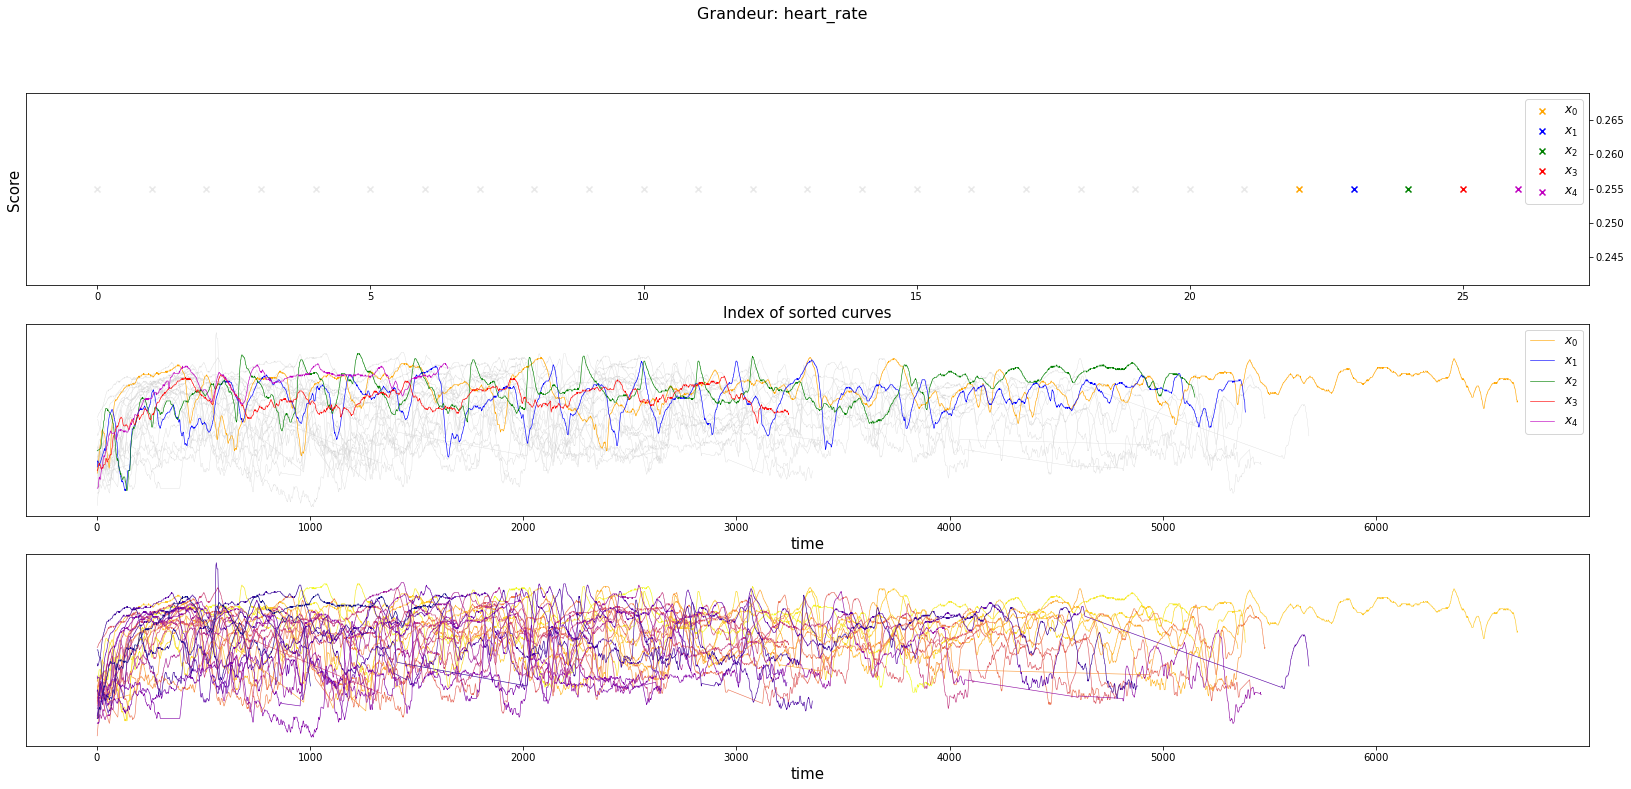

In [27]:
training = 'intensity'
grandeur_list = ['heart_rate']#, 'speed_meters_per_sec', 'power_watts', 'bike_cadence', 'distance_cumul'] #'power_watts'

for grandeur in grandeur_list:
    df_ath1_ts, length_max = prepare_FIF(df_ath1, qtty='type_ent', qtty_val=training, grandeur=grandeur)
    df_ath1_ts = df_ath1_ts.interpolate(method='linear', axis=1, limit=None, inplace=False, limit_direction=None, limit_area='inside')

    X_ts, tps_ts, X_anomaly_score = compute_FIF(df_fif=df_ath1_ts, len_max=length_max, train=training, grandeur=grandeur, dict_val=2, nb_trees=20)

    print("\n\n")
    plot_FIF(X_ts_loc=X_ts, tps_ts_loc=tps_ts, X_anomaly_score_loc=X_anomaly_score, grandeur=grandeur)

In [16]:
print(f"Time taken so far: {time.time()-t_start_global0}")

Time taken so far: 15.548346996307373


In [17]:
print(f"Overall time taken: {time.time()-t_start_global0}")

Overall time taken: 15.557302236557007
